**Gradient Descent**

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import random
import math
import numpy as np
from matplotlib import pyplot as plt

Prepare the dataset


In [ ]:
data = np.random.randn(500,2)
theta = np.zeros(2)

In [ ]:
def loss_func(data, theta):
  m = theta[0]
  b = theta[1]
  loss = 0
  for i in range(0, len(data)):
    x = data[i,0]
    y = data[i,1]
    y_hat = (m*x + b)
    loss +=((y - y_hat)**2)
  mse = loss/float(len(data))
  return mse

In [ ]:
def compute_gradients(data, theta):
  grads = np.zeros(2)
  N = float(len(data))
  m = theta[0]
  b = theta[1]
  for i in range(len(data)):
    x = data[i, 0]
    y = data[i, 1]

    grads[0]  += -(2/N) * x * (y - ((m * x) + b))
    grads[0]  += -(2/N) * x * (y - ((theta[0] * x) + b))

  eps = 1e-6
  grads = np.divide(grads, N+eps)
  return grads

In [ ]:
#update rule
theta = np.zeros(2)
gr_loss = []
for t in range(5000):
  grads = compute_gradients(data, theta)
  theta = theta - (1e-2*grads)
  gr_loss.append(loss_func(data, theta))

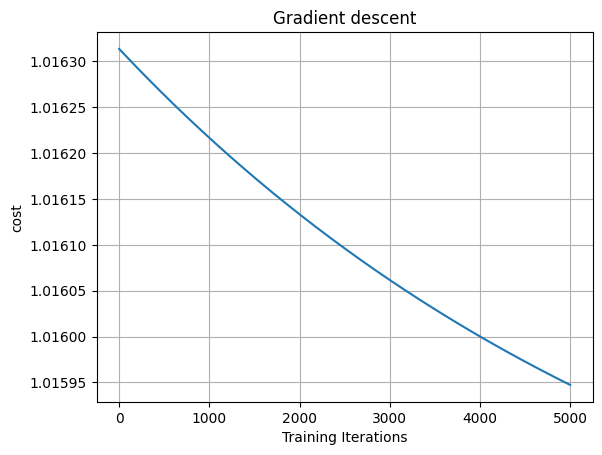

In [ ]:
plt.plot(gr_loss)
plt.grid()
plt.xlabel("Training Iterations")
plt.ylabel("cost")
plt.title("Gradient descent");

In [ ]:
def minibatch(data, theta, lr = 1e-2, minibatch_ratio = 0.01, num_iterations = 5000):
  loss = []
  minibatch_size = int(math.ceil(len(data) * minibatch_ratio))
  for t in range(num_iterations):
    sample_size = random.sample(range(len(data)), minibatch_size)
    np.random.shuffle(data)

    sample_data = data[0:sample_size[0], :]
    grad = compute_gradients(sample_data, theta)
    theta -= (lr * grad)
    loss.append(loss_func(data, theta))
  return loss

In [ ]:
theta = np.zeros(2)
mini_loss = minibatch(data, theta)


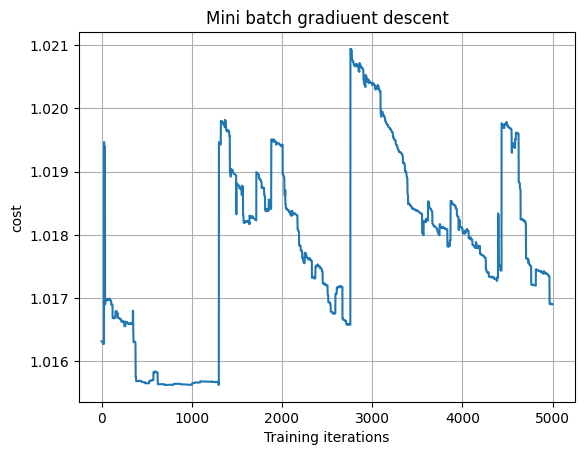

In [ ]:
plt.plot(mini_loss, label="Mini batch")
plt.grid()
plt.xlabel("Training iterations")
plt.ylabel("cost")
plt.title("Mini batch gradiuent descent");

In [ ]:
def momentum(data, theta, lr = 1e-2, gamma = 0.9, num_iterations = 5000):
  loss =[]
  vt = np.zeros(theta.shape[0])
  for t in range(num_iterations):
    grads = compute_gradients(data, theta)
    vt = gamma * vt + lr*grads
    theta -= vt
    loss.append(loss_func(data, theta))
  return loss

In [ ]:
theta = np.zeros(2)
momentum_loss = momentum(data, theta)

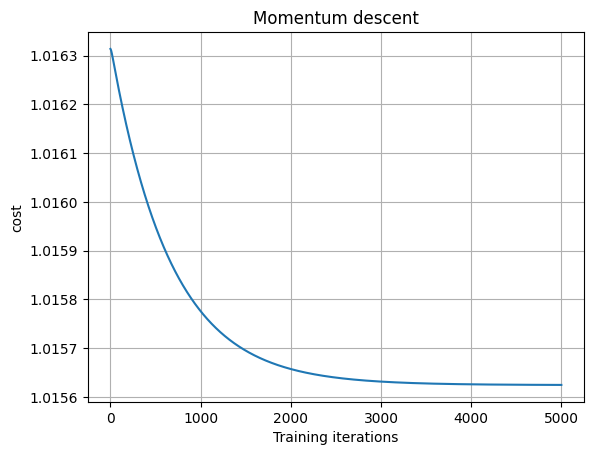

In [ ]:
plt.plot(momentum_loss, label="Momentum loss")
plt.grid()
plt.xlabel("Training iterations")
plt.ylabel("cost")
plt.title("Momentum descent");